# Task1: Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
# importing the dataset
X = pd.read_csv('data_X.csv', delimiter=",", header=None)
y = pd.read_csv('data_y.csv', delimiter=",", header=None)

print(X.shape)
print(y.shape)

(90000, 3)
(180, 1)


In [37]:
X= np.array(X)
y= np.array(y)

Ques 1:Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

In [38]:
y

array([[6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

63
(500, 3)
105
(500, 3)
84
(500, 3)
21
(500, 3)
42
(500, 3)
0
(500, 3)


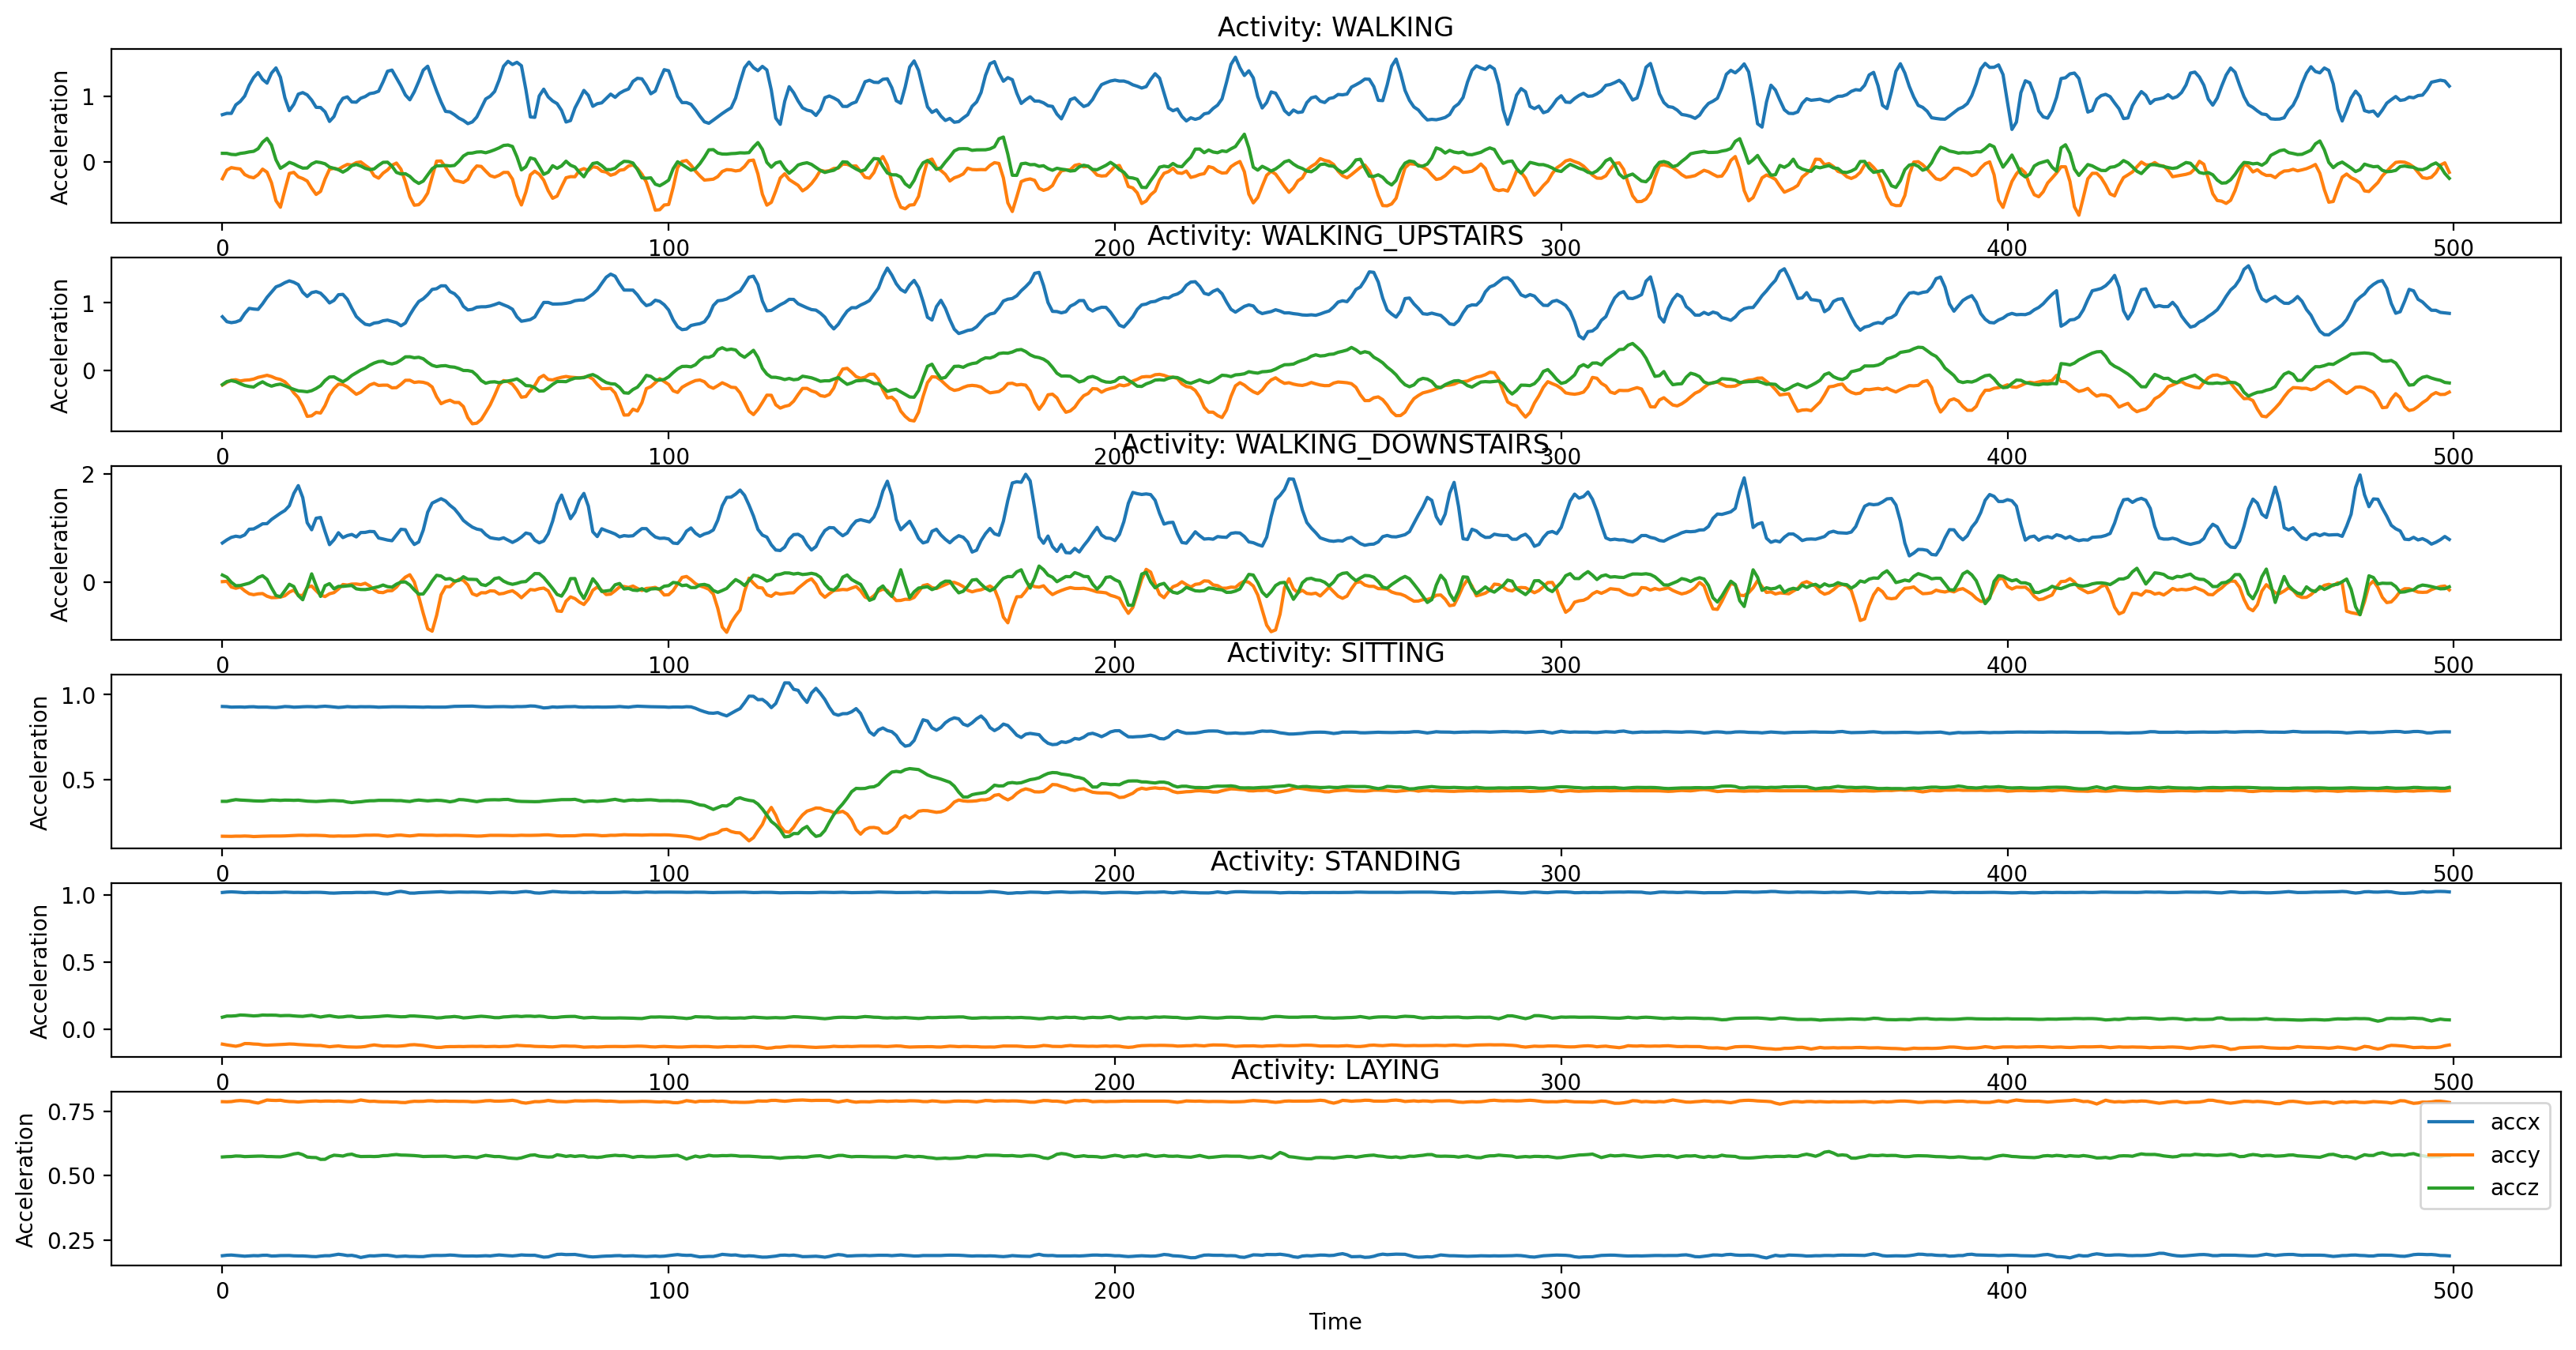

In [21]:
all_activities= np.unique(y)

activity_codes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 10))

i= 0
for activity,code in activity_codes.items():

    idx = np.where(y == code)[0][0]
    print(idx)

    x = X[500*idx:500*(idx+1)]

    print(x.shape)

    axes[i].set_title(f'Activity: {activity}')
    axes[i].plot(x[:,0], label= 'accx')
    axes[i].plot(x[:,1], label= 'accy')
    axes[i].plot(x[:,2], label= 'accz')

    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')

    i +=1

plt.legend()
plt.show()

Q. Are you able to see any difference/similarities between the activities?
From the Plots it is clear that Static Activities(SITTING, STANDING, LAYING) have low-variance data,
 where Dyanmic activities(WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) have highly varying data. 

Q. Do you think the model will be able to classify the activities based on the data?
The Static Activities can be easily identified from their characteristic saturated values. 
We'd need the Decision Trees classifier(Real I/P Discrete O/P) models for classification of
Dynamic Activities.

Ques 2: Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (accx2+accy2+accz2) for each activity and justify your answer. [0.5 marks]

63
(500, 3)
105
(500, 3)
84
(500, 3)
21
(500, 3)
42
(500, 3)
0
(500, 3)


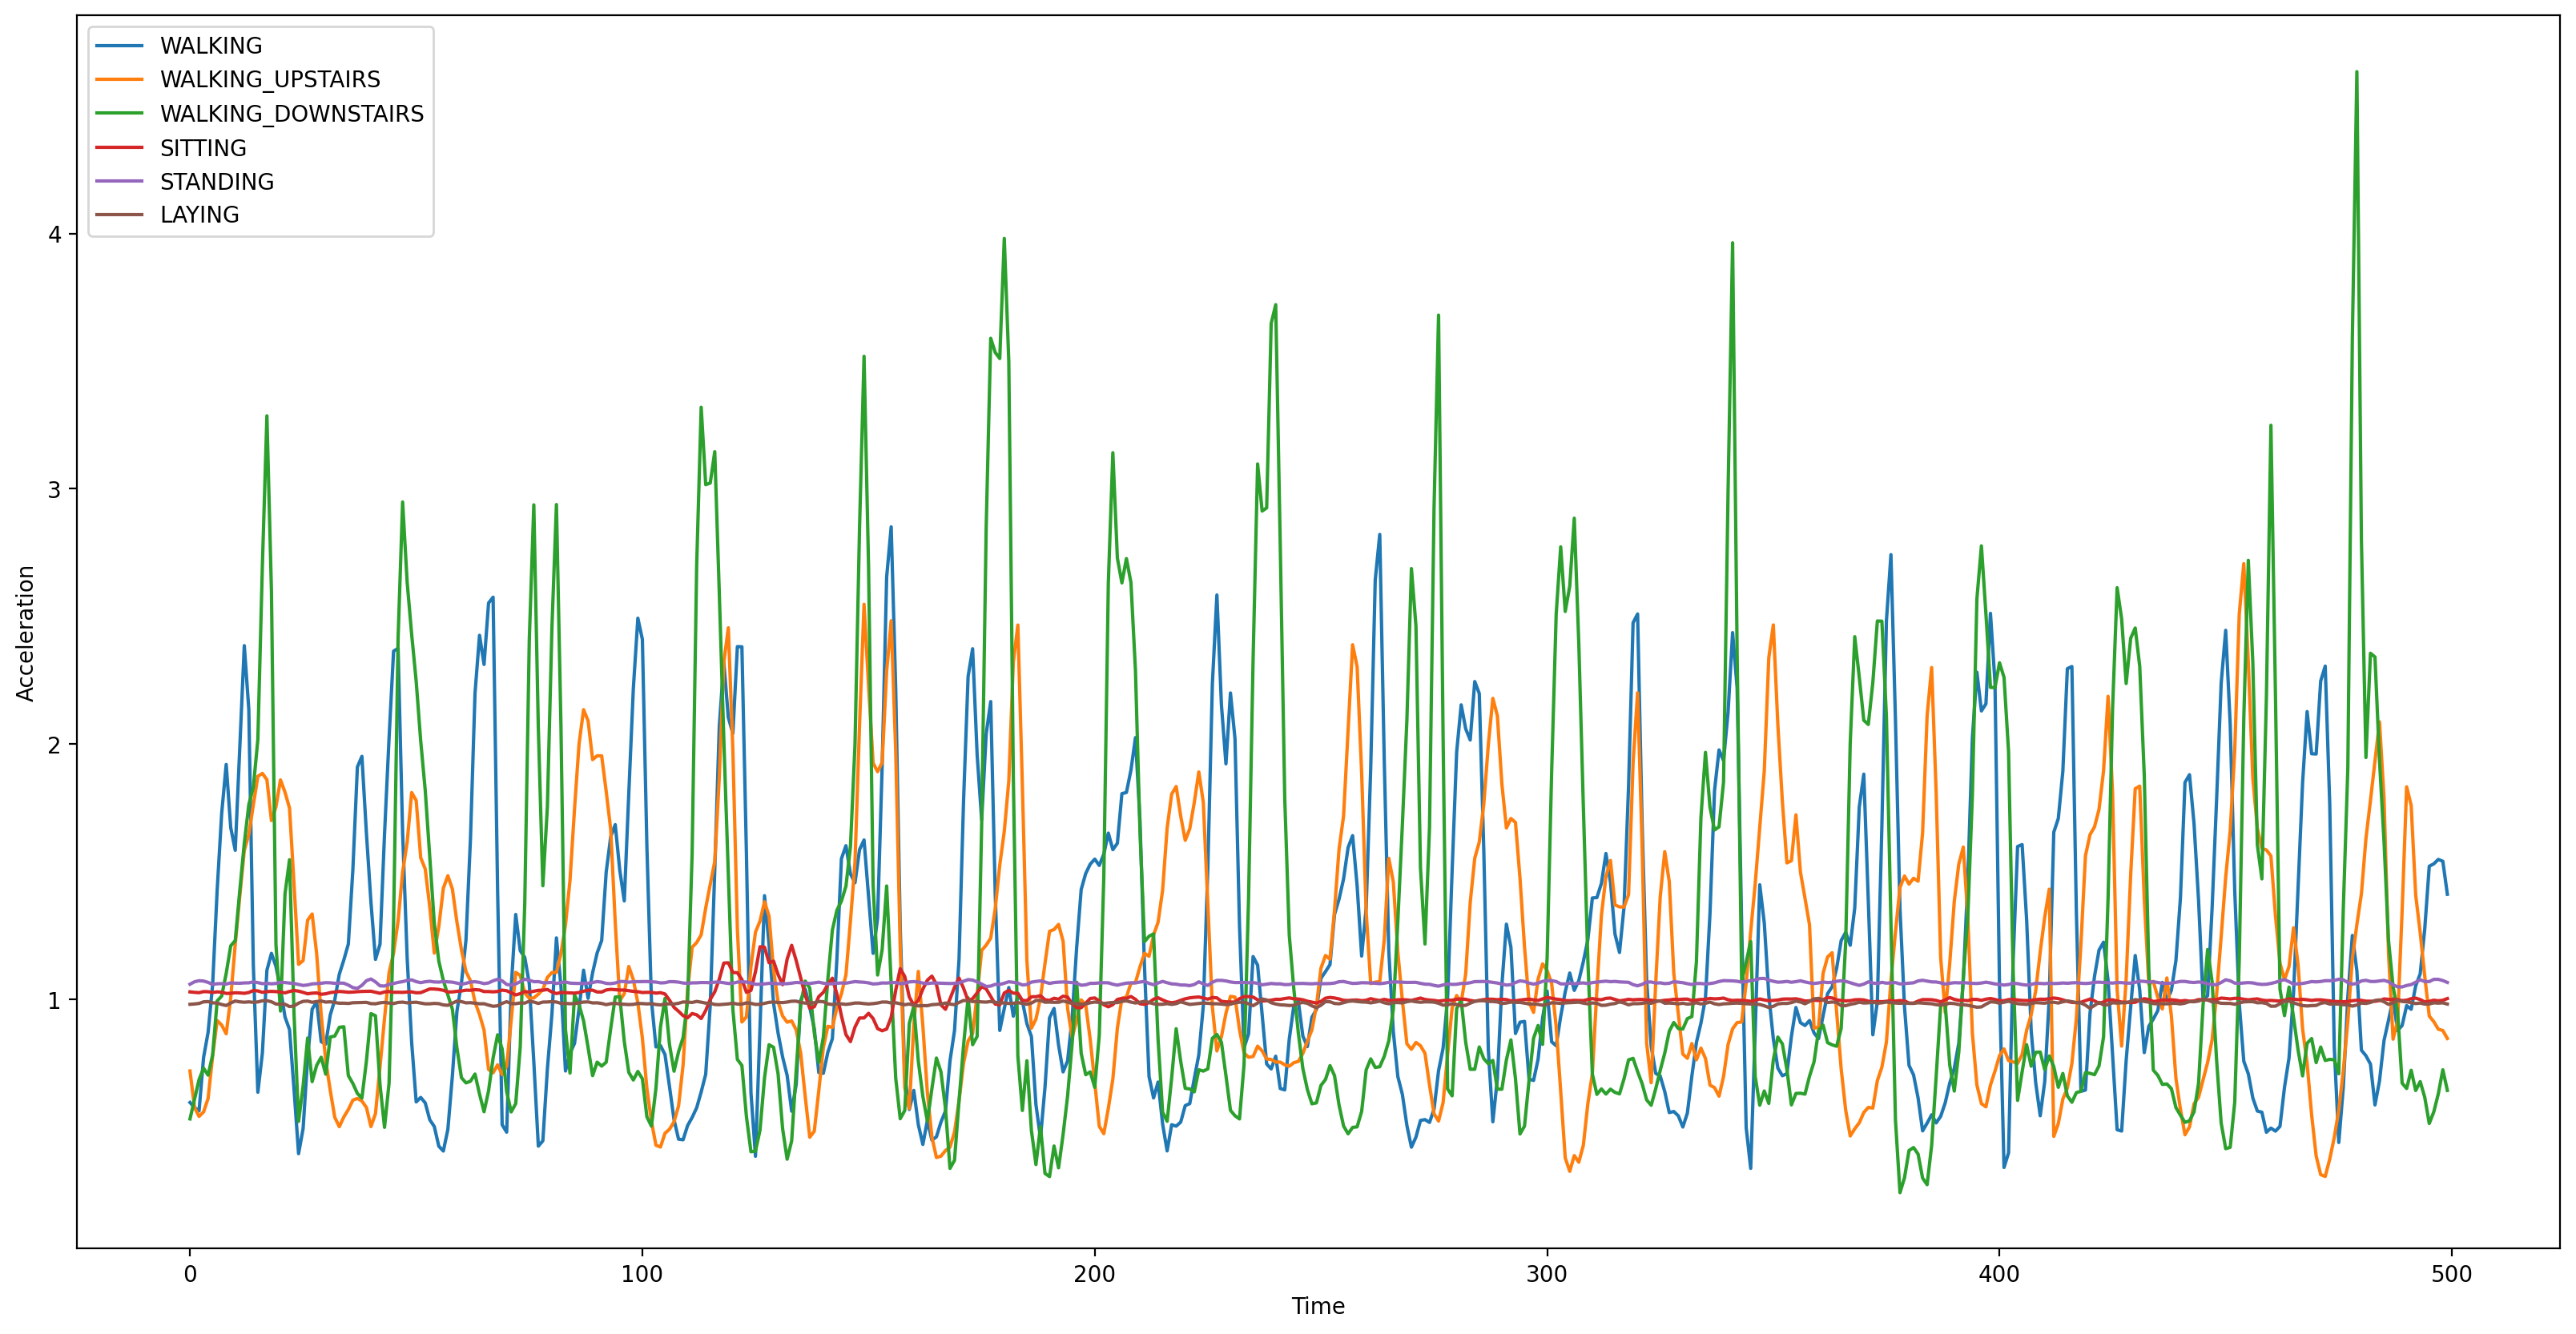

In [22]:
all_activities= np.unique(y)

activity_codes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

fig, ax = plt.subplots(figsize=(20, 10))

for activity,code in activity_codes.items():

    idx = np.where(y == code)[0][0]
    print(idx)

    x = X[500*idx:500*(idx+1)]
    print(x.shape)

    ax.plot(x[:,0]**2 + x[:,1]**2 + x[:,2]**2 , label= activity)

ax.set_xlabel('Time')
ax.set_ylabel('Acceleration')
plt.legend()
plt.show()

Q. Do you think we need a machine learning model to differentiate between static activities
 (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)?
A. No, we can easily differentiate between Static and Dynamic Activities using the data provided.
Static Activities have low-variance data, where as Dynamic Activities have high-variance data.
Static Activities can be easily identified from their characteristic saturated values.

Ques 3i: Use PCA (Principal Component Analysis) on Total Acceleration (accx2+accy2+accz2)
to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)
x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)
x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)
x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)
x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)
x.shape:  (500, 3)
pca_vectors.shape:  (500, 2)


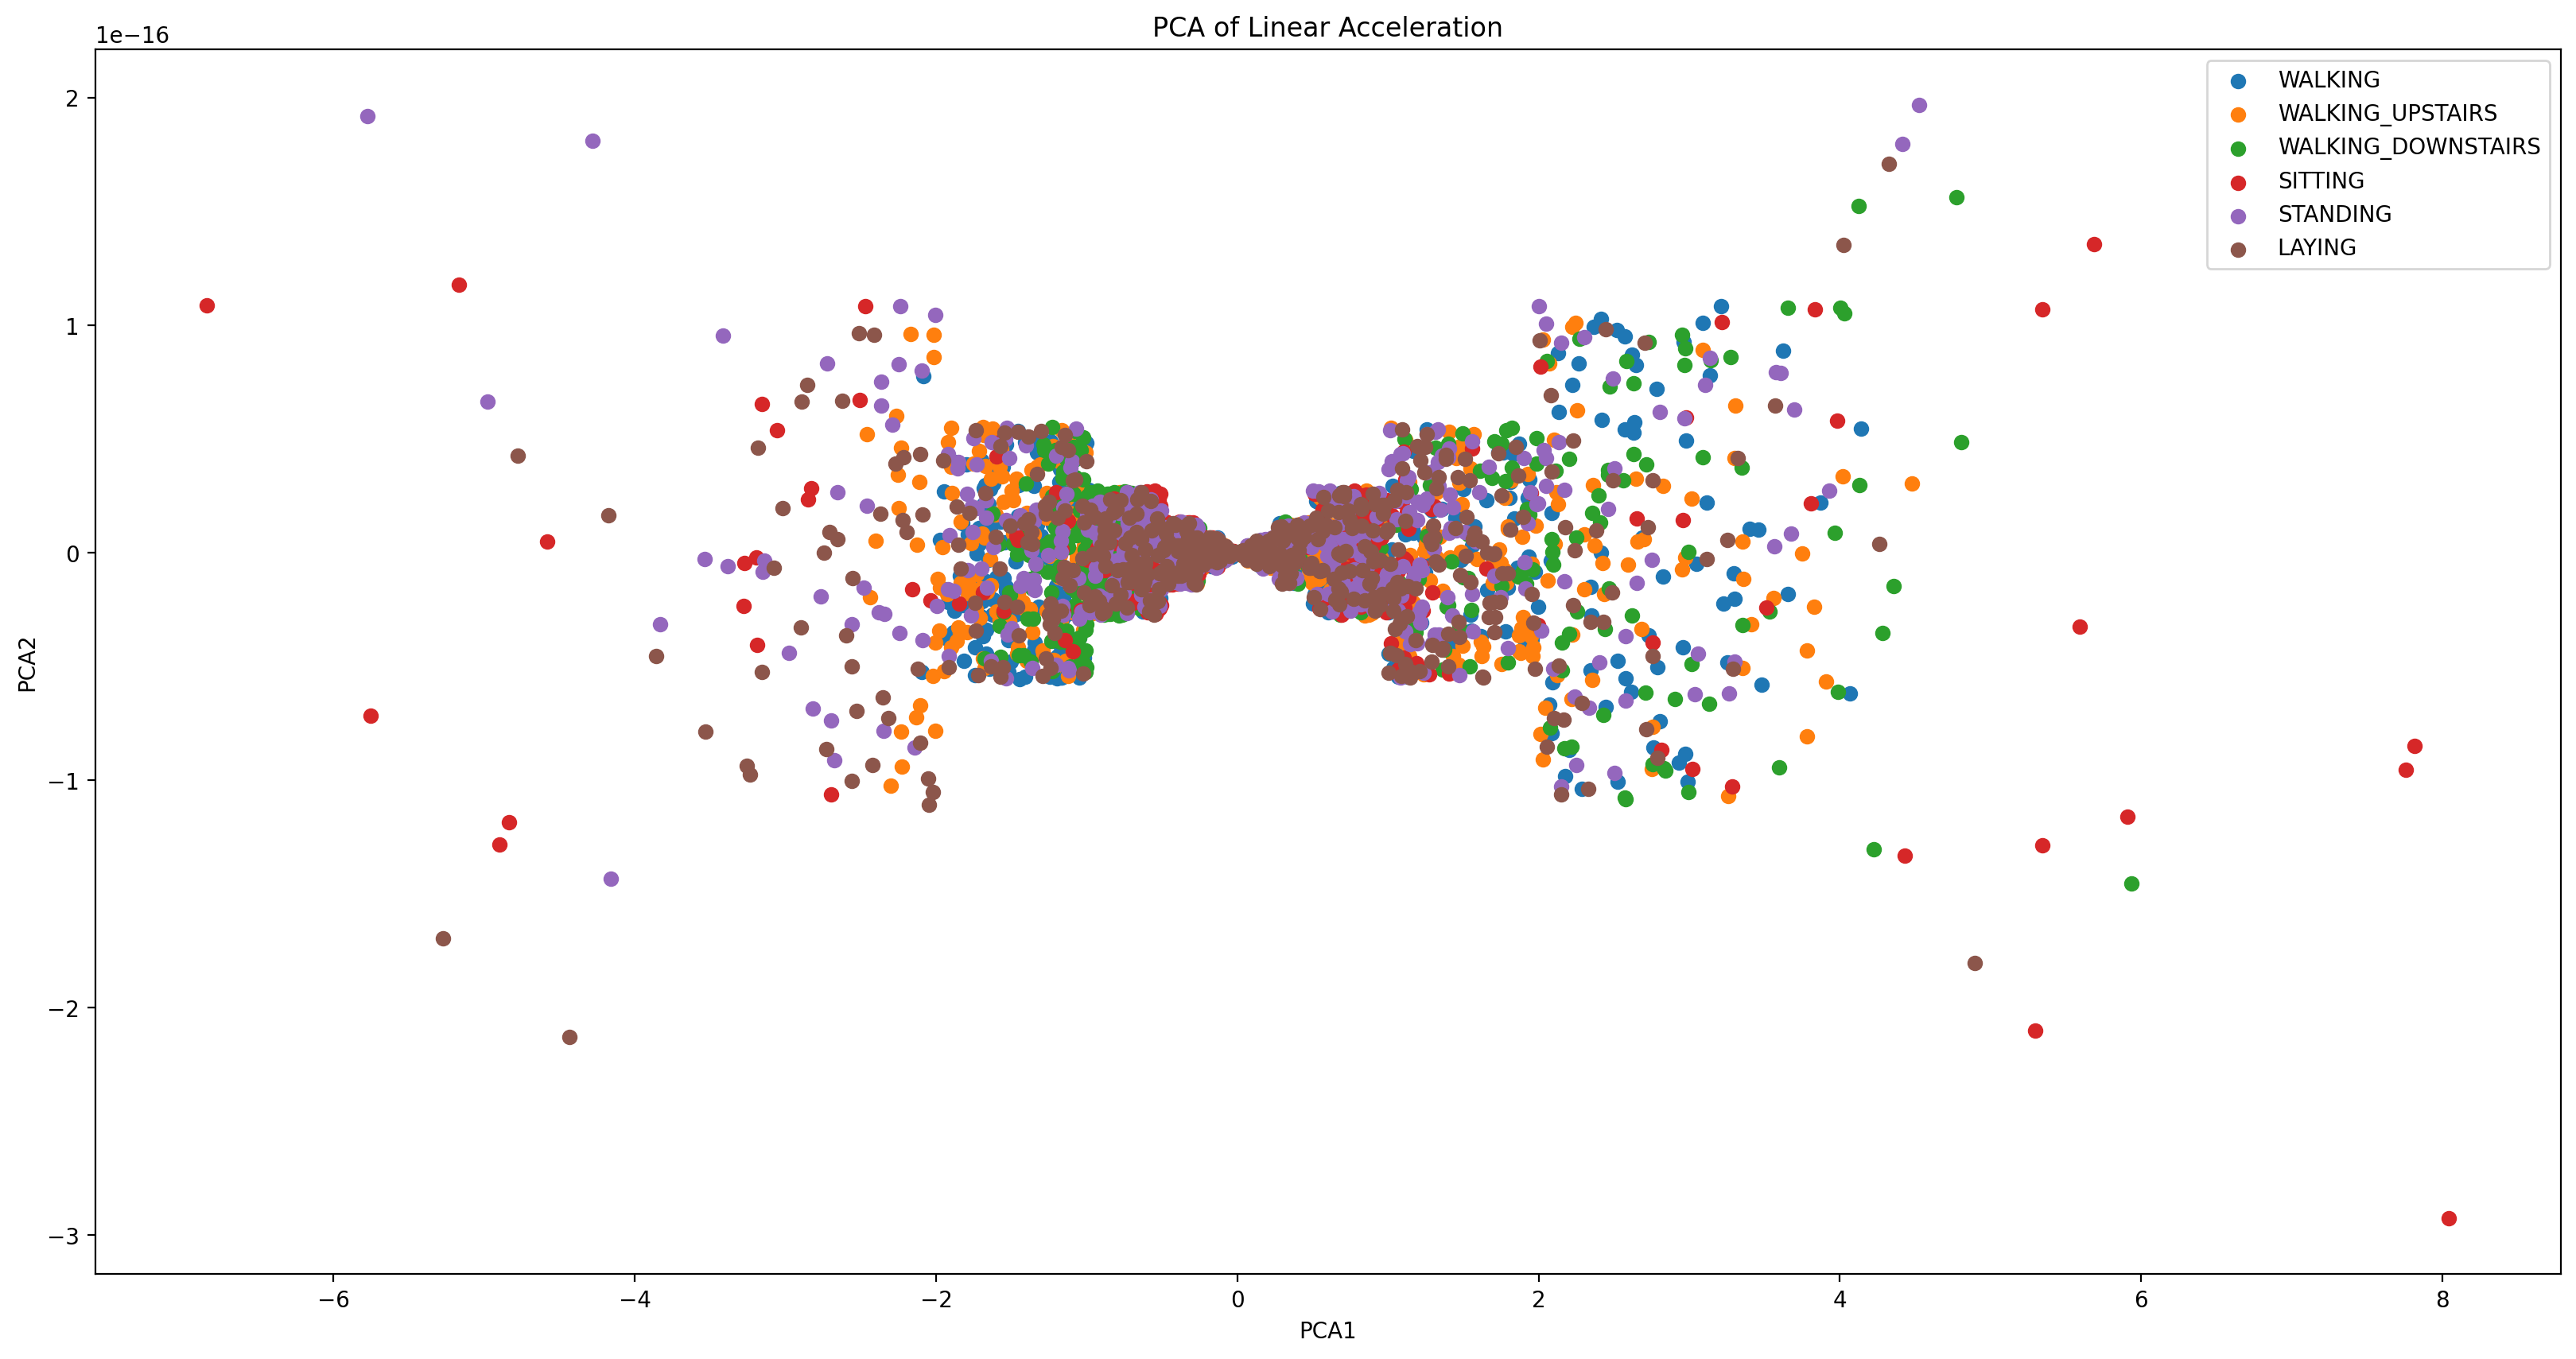

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

all_activities= np.unique(y)

activity_codes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

fig, ax = plt.subplots(figsize=(20, 10))

for activity,code in activity_codes.items():

    idx = np.where(y == code)[0][0]

    x = X[500*idx:500*(idx+1)]
    print("x.shape: ",x.shape)

    linear_acc = x[:,0]**2 + x[:,1]**2 + x[:,2]**2
    linear_acc = linear_acc.reshape(-1,1)
    linear_acc = np.concatenate((linear_acc, linear_acc), axis= 1)

    # normalize the data
    scaler = StandardScaler()
    linear_acc = scaler.fit_transform(linear_acc)
    
    pca = PCA(n_components=2)
    pca.fit(linear_acc)
    pca_vectors = pca.transform(linear_acc)

    print("pca_vectors.shape: ", pca_vectors.shape)
    ax.scatter(pca_vectors[:,0], pca_vectors[:,1], label= activity)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('PCA of Linear Acceleration')

plt.legend()
plt.show()

Ques 3ii : Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

Time Series Feature Extraction Library (TSFEL) is a Python package for efficient feature extraction from time series data. It offers a comprehensive set of feature extraction routines without requiring extensive programming effort. TSFEL automatically extracts over 65 features spanning statistical, temporal, spectral, and fractal domains.

idxs:  [ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83 153 154 155 156 157 158 159 160 161]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)
idxs:  [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 171 172 173 174 175 176 177 178 179]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)
idxs:  [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 162 163 164 165 166 167 168 169 170]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)
idxs:  [ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41 135 136 137 138 139 140 141 142 143]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)
idxs:  [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62 144 145 146 147 148 149 150 151 152]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)
idxs:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20 126 127 128 129 130 131 132 133 134]
x.shape:  (15000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
x_tsfel.shape:  (299, 552)
pca_vectors.shape:  (299, 2)


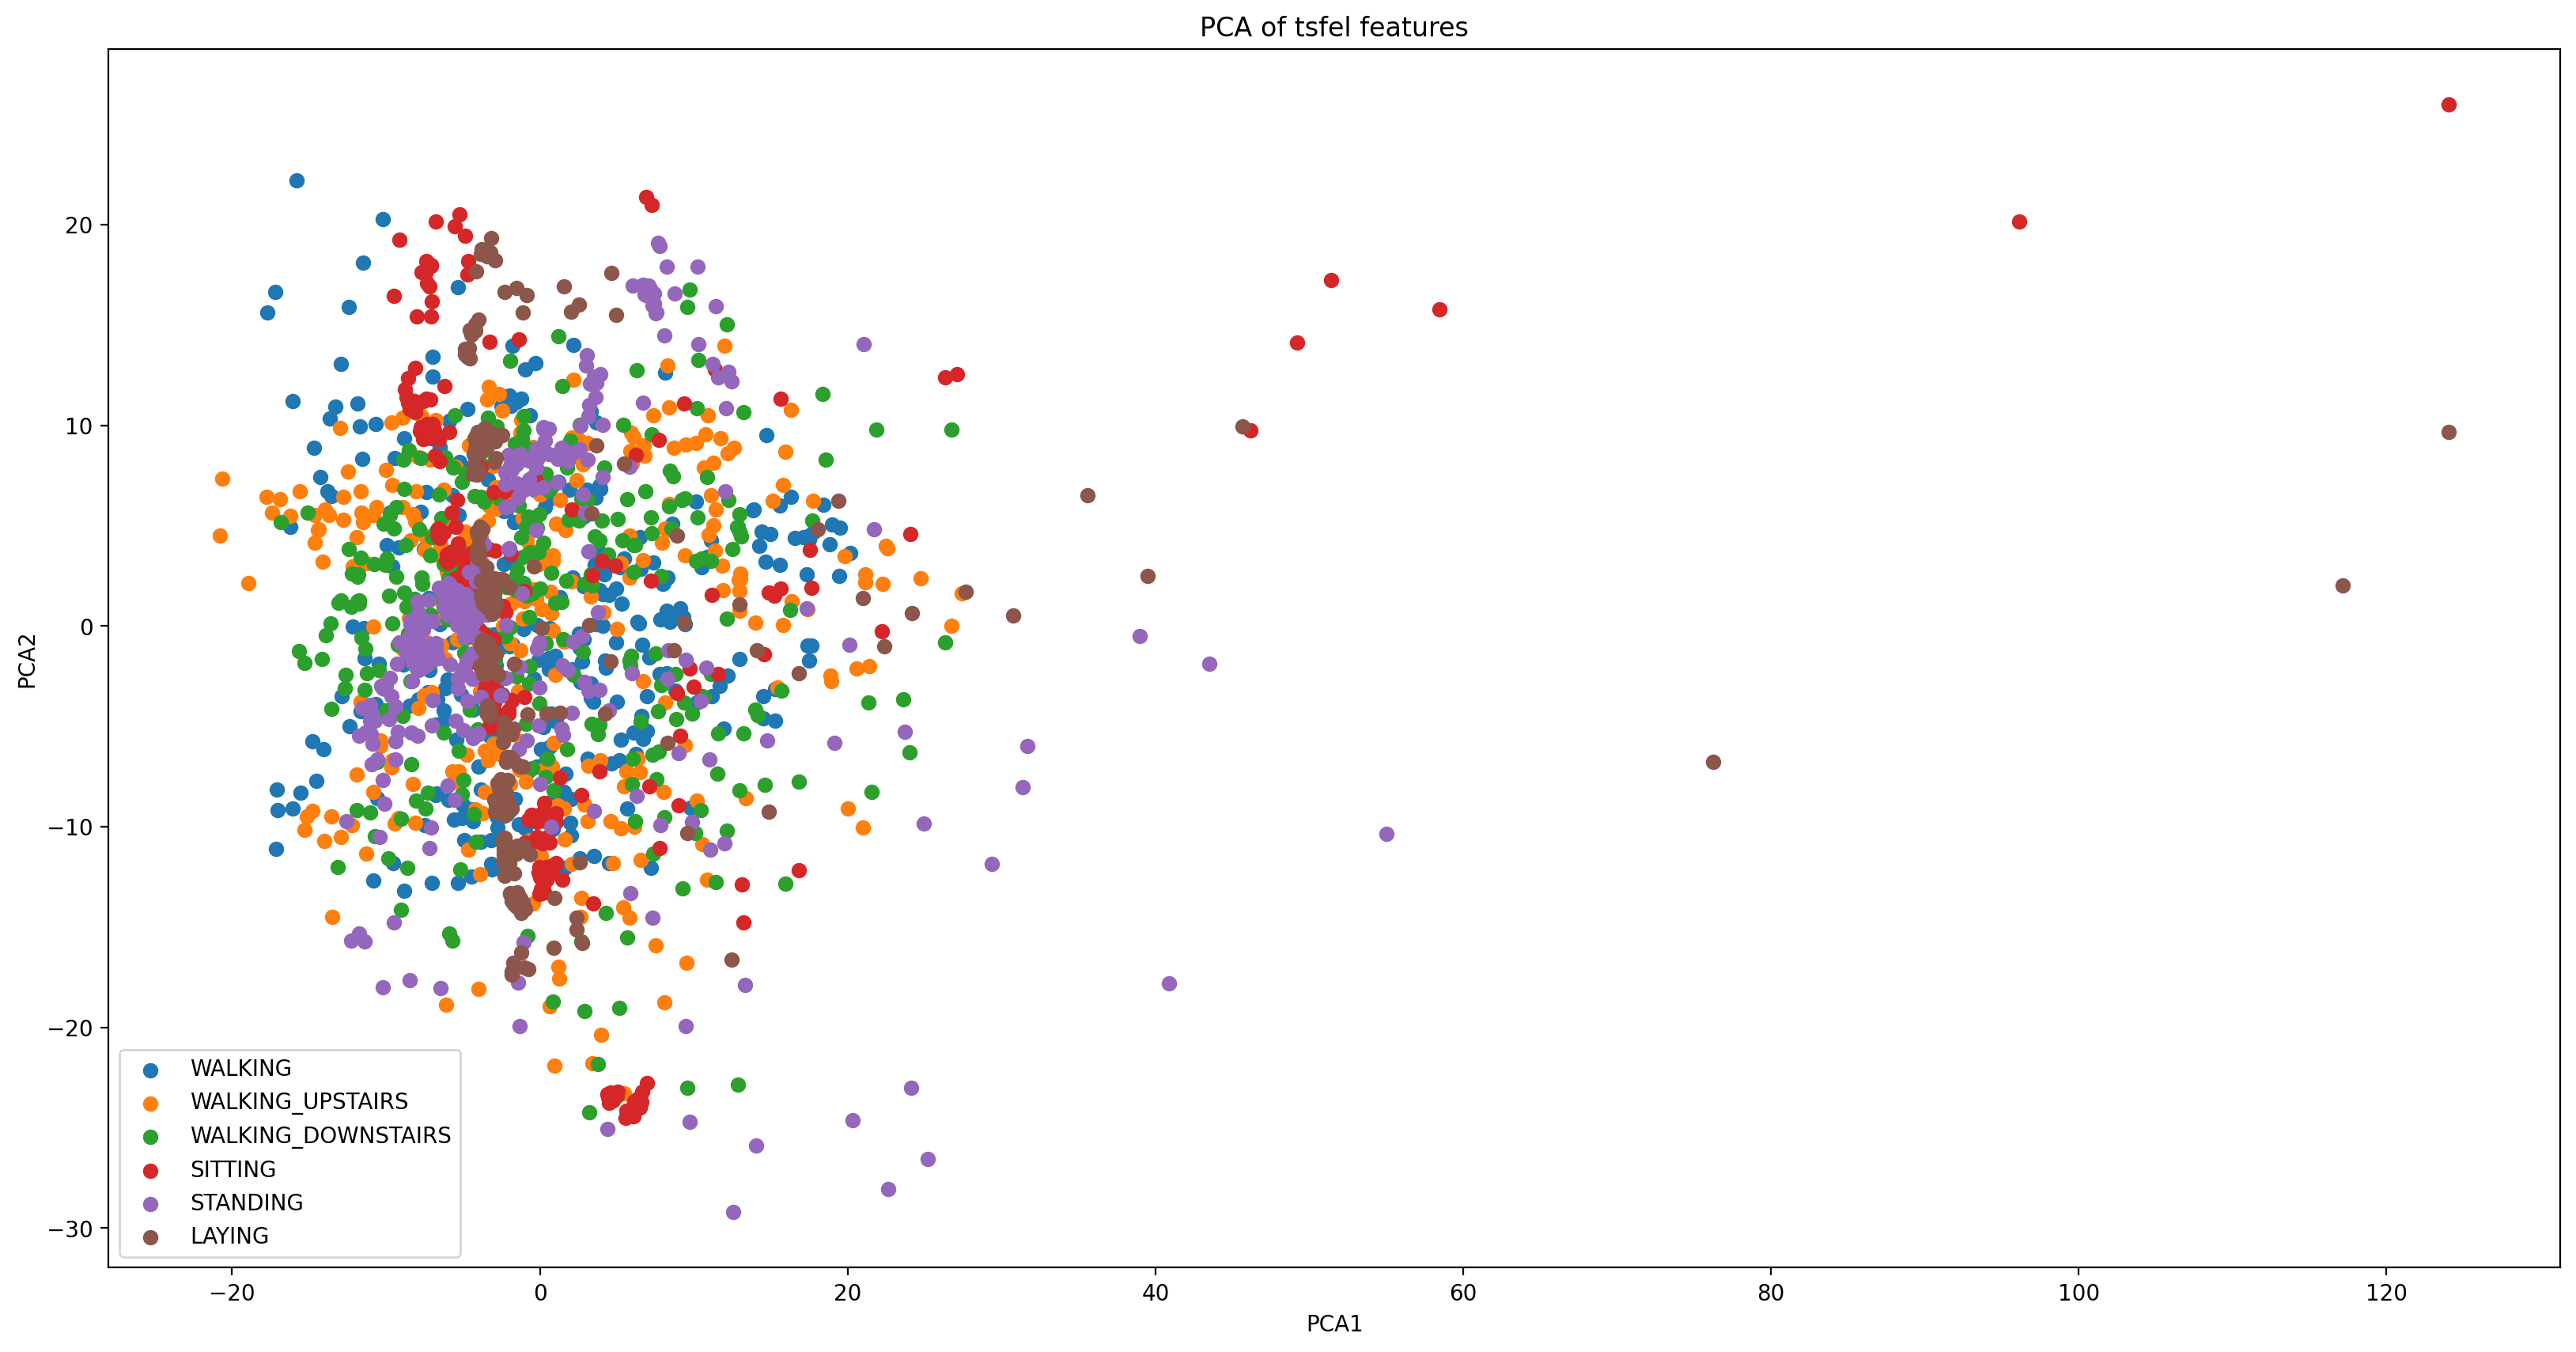

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tsfel

all_activities= np.unique(y)

activity_codes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

fig, ax = plt.subplots(figsize=(20, 10))

for activity,code in activity_codes.items():

    idxs = np.where(y == code)[0]
    print("idxs: ",idxs)
    
    x = X[500*idxs[0]:500*(idxs[0]+1)]
    for idx in idxs[1:]:
        x = np.concatenate((x, X[500*idx:500*(idx+1)]), axis= 0)
    print("x.shape: ",x.shape)

    df = pd.DataFrame(x, columns=["acc_x", "acc_y", "acc_z"])

    ts = tsfel.get_features_by_domain()             # If no argument is passed retrieves all available features
    x_tsfel = tsfel.time_series_features_extractor(ts, df, fs=50, window_size=100, overlap= 0.5)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features

    print("x_tsfel.shape: ",x_tsfel.shape)

    # Normalize the data
    scaler = StandardScaler()
    x_tsfel = scaler.fit_transform(x_tsfel)
    
    pca = PCA(n_components=2)
    pca.fit(x_tsfel)
    pca_vectors = pca.transform(x_tsfel)

    print("pca_vectors.shape: ",pca_vectors.shape)
    ax.scatter(pca_vectors[:,0], pca_vectors[:,1], label= activity)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('PCA of tsfel features')

plt.legend()
plt.show()

Observation: The scatter plot obtained by using the TSFEL library on the 3-axis accelerometer values is significantly better than the plot obtained by directly using PCA on total linear acceleration.

Not only are the static and dynamic activities distinguishable, individual activities have also been spaced out well.

Ques 3iii : Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

idxs:  [ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83 153 154 155 156 157 158 159 160 161]
x.shape:  (15000, 3)
pca_vectors.shape:  (15000, 2)
idxs:  [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 171 172 173 174 175 176 177 178 179]
x.shape:  (15000, 3)
pca_vectors.shape:  (15000, 2)
idxs:  [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 162 163 164 165 166 167 168 169 170]
x.shape:  (15000, 3)
pca_vectors.shape:  (15000, 2)
idxs:  [ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41 135 136 137 138 139 140 141 142 143]
x.shape:  (15000, 3)
pca_vectors.shape:  (15000, 2)
idxs:  [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62 144 145 146 147 148 149 150 151 152]
x.shape:  (15000, 3)
pca_vectors.shape:  (15000, 2)
idxs:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  

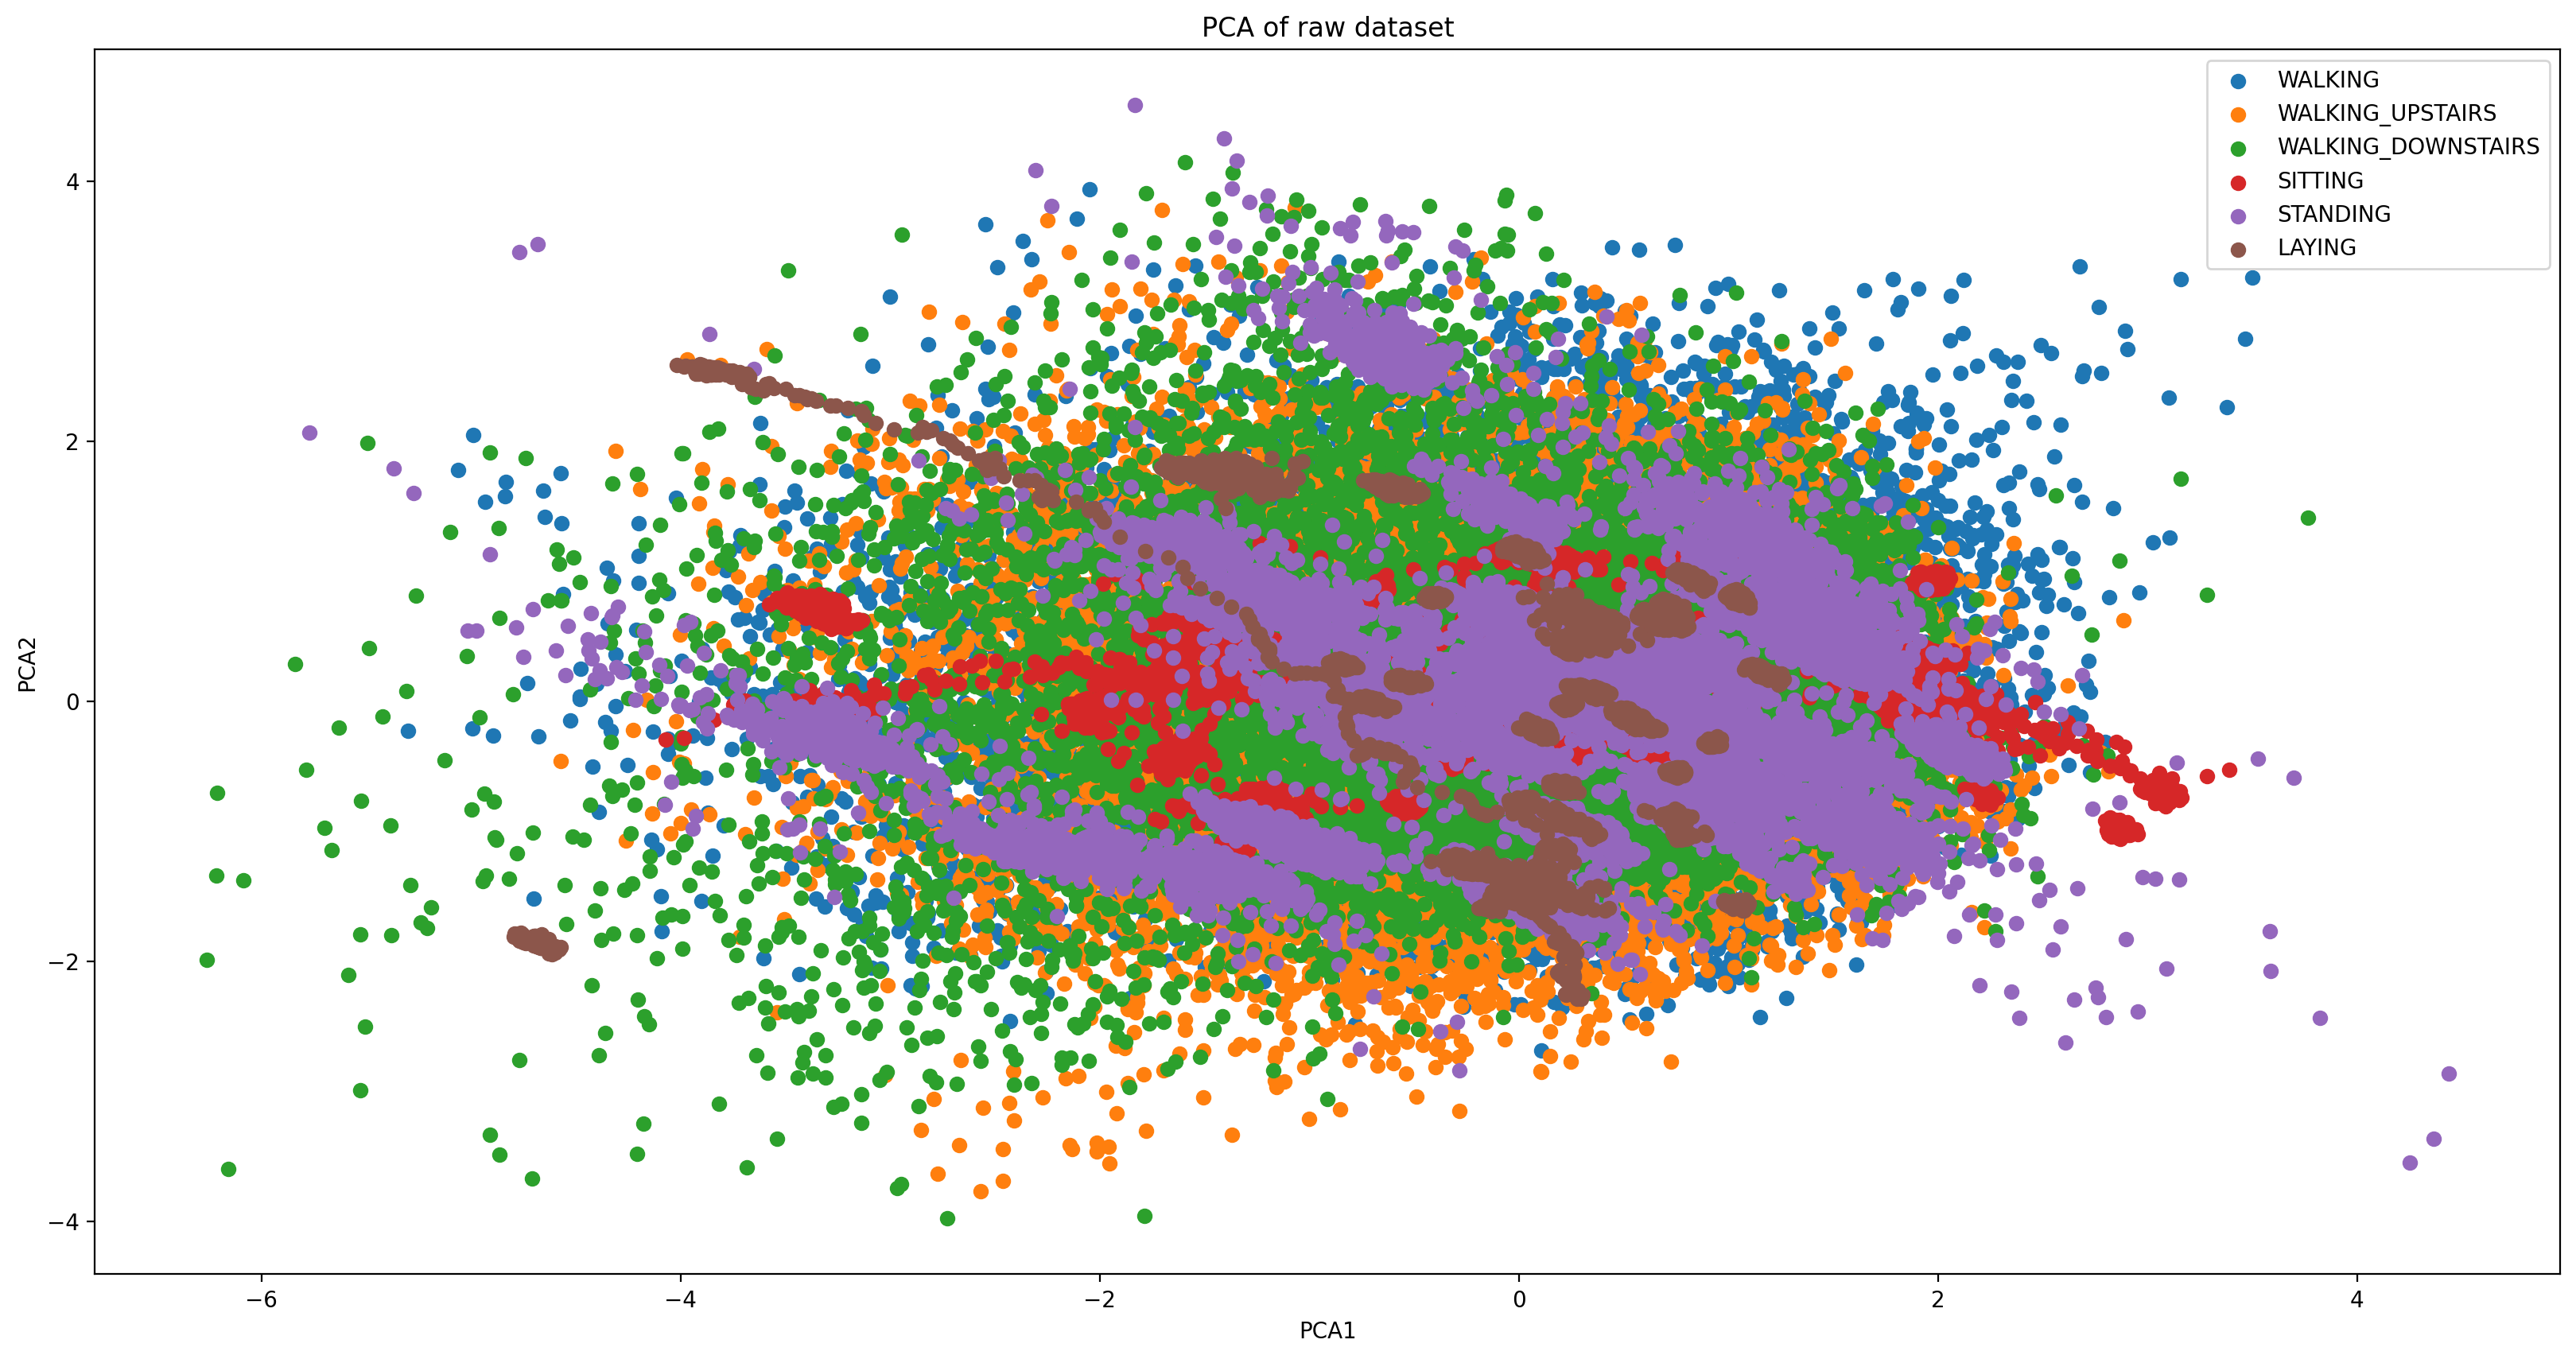

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tsfel

all_activities= np.unique(y)

activity_codes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

fig, ax = plt.subplots(figsize=(20, 10))

for activity,code in activity_codes.items():

    idxs = np.where(y == code)[0]
    print("idxs: ",idxs)
    
    x = X[500*idxs[0]:500*(idxs[0]+1)]
    for idx in idxs[1:]:
        x = np.concatenate((x, X[500*idx:500*(idx+1)]), axis= 0)
    print("x.shape: ",x.shape)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    pca = PCA(n_components=2)
    pca.fit(x)
    pca_vectors = pca.transform(x)

    print("pca_vectors.shape: ",pca_vectors.shape)
    ax.scatter(pca_vectors[:,0], pca_vectors[:,1], label= activity)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('PCA of raw dataset')

plt.legend()
plt.show()

Ques 3iv : Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

PCA on tsfel features has the most separated distribution followed by PCA on total acceleration and then the dataset features.

Ques 4: Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [46]:
# Retrieves a pre-defined feature configuration file to extract all available features
ts = tsfel.get_features_by_domain()           # If no argument is passed retrieves all available features

# Extract features
tsfel_df = tsfel.time_series_features_extractor(ts, pd.DataFrame(X) , fs=50, window_size=500)   

print("Correlation matrix of tsfel features\n")
display(tsfel_df.iloc[:,:5].corr())

*** Feature extraction started ***



*** Feature extraction finished ***
Correlation matrix of tsfel features



,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid
0_Absolute energy,1.000000,0.982324,-0.298890,1.000000,0.194906
0_Area under the curve,0.982324,1.000000,-0.257843,0.982324,0.208028
0_Autocorrelation,-0.298890,-0.257843,1.000000,-0.298890,-0.379226
0_Average power,1.000000,0.982324,-0.298890,1.000000,0.194906
0_Centroid,0.194906,0.208028,-0.379226,0.194906,1.000000
